In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('heart-disease-eda-predictions')
jovian.set_colab_id('1aHCKcDu1mlzkcV8ay24YGRjmQB34Qjf7')

# heart-disease-eda-predictions

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="heart-disease-eda-predictions")

In [ ]:
!pip install opendatasets --upgrade

In [ ]:
!pip install dataprep --upgrade

     |████████████████████████████████| 9.5 MB 6.6 MB/s 
     |████████████████████████████████| 943 kB 48.1 MB/s 
     |████████████████████████████████| 95 kB 4.8 MB/s 
     |████████████████████████████████| 965 kB 52.8 MB/s 
     |████████████████████████████████| 1.5 MB 56.6 MB/s 
     |████████████████████████████████| 749 kB 35.5 MB/s 
     |████████████████████████████████| 366 kB 63.2 MB/s 
     |████████████████████████████████| 10.9 MB 44.6 MB/s 
     |████████████████████████████████| 133 kB 57.3 MB/s 
     |████████████████████████████████| 78 kB 8.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 50 kB 7.5 MB/s 
     |████████████████████████████████| 1.1 MB 42.3 MB/s 
     |████████████████████████████████| 1.0 MB 43.6 MB/s 
     |████████████████████████████████| 271 kB 53.6 MB/s 
     |████████████████████████████████| 144 kB 58.9 MB/s 
     |████

In [ ]:
#importing required libraries
import opendatasets as od
from dataprep.eda import create_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/ubantukali/heartdisease'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sanjayyanadi
Your Kaggle Key: ··········


100%|██████████| 24.7k/24.7k [00:00<00:00, 9.35MB/s]

In [ ]:
data_filename='./heartdisease/heart_failure_clinical_records.csv'

In [ ]:
df=pd.read_csv(data_filename)

In [ ]:
df

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,299,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,300,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,301,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,302,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,303,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,1789,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
1491,1790,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
1492,1791,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
1493,1792,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1495 non-null   int64  
 1   age                       1495 non-null   float64
 2   anaemia                   1495 non-null   int64  
 3   creatinine_phosphokinase  1495 non-null   int64  
 4   diabetes                  1495 non-null   int64  
 5   ejection_fraction         1495 non-null   int64  
 6   high_blood_pressure       1495 non-null   int64  
 7   platelets                 1495 non-null   float64
 8   serum_creatinine          1495 non-null   float64
 9   serum_sodium              1495 non-null   int64  
 10  sex                       1495 non-null   int64  
 11  smoking                   1495 non-null   int64  
 12  time                      1495 non-null   int64  
 13  DEATH_EVENT               1495 non-null   int64  
dtypes: float

In [ ]:
df.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.nunique()

Unnamed: 0                  1495
age                           47
anaemia                        2
creatinine_phosphokinase     208
diabetes                       2
ejection_fraction             17
high_blood_pressure            2
platelets                    176
serum_creatinine              40
serum_sodium                  27
sex                            2
smoking                        2
time                         148
DEATH_EVENT                    2
dtype: int64

In [ ]:
df.drop(0)

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,300,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,301,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,302,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,303,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,304,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,1789,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
1491,1790,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
1492,1791,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
1493,1792,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
1491,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
1492,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
1493,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000,1495.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.393880,136.625418,0.648829,0.321070,130.260870,0.321070
std,11.878875,0.495443,968.988097,0.493405,11.818987,0.477496,97673.219748,1.033124,4.406566,0.477496,0.467044,77.510237,0.467044
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,212000.000000,0.900000,134.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,304000.000000,1.400000,140.000000,1.000000,1.000000,205.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee2080a410>,
      dtype=object)

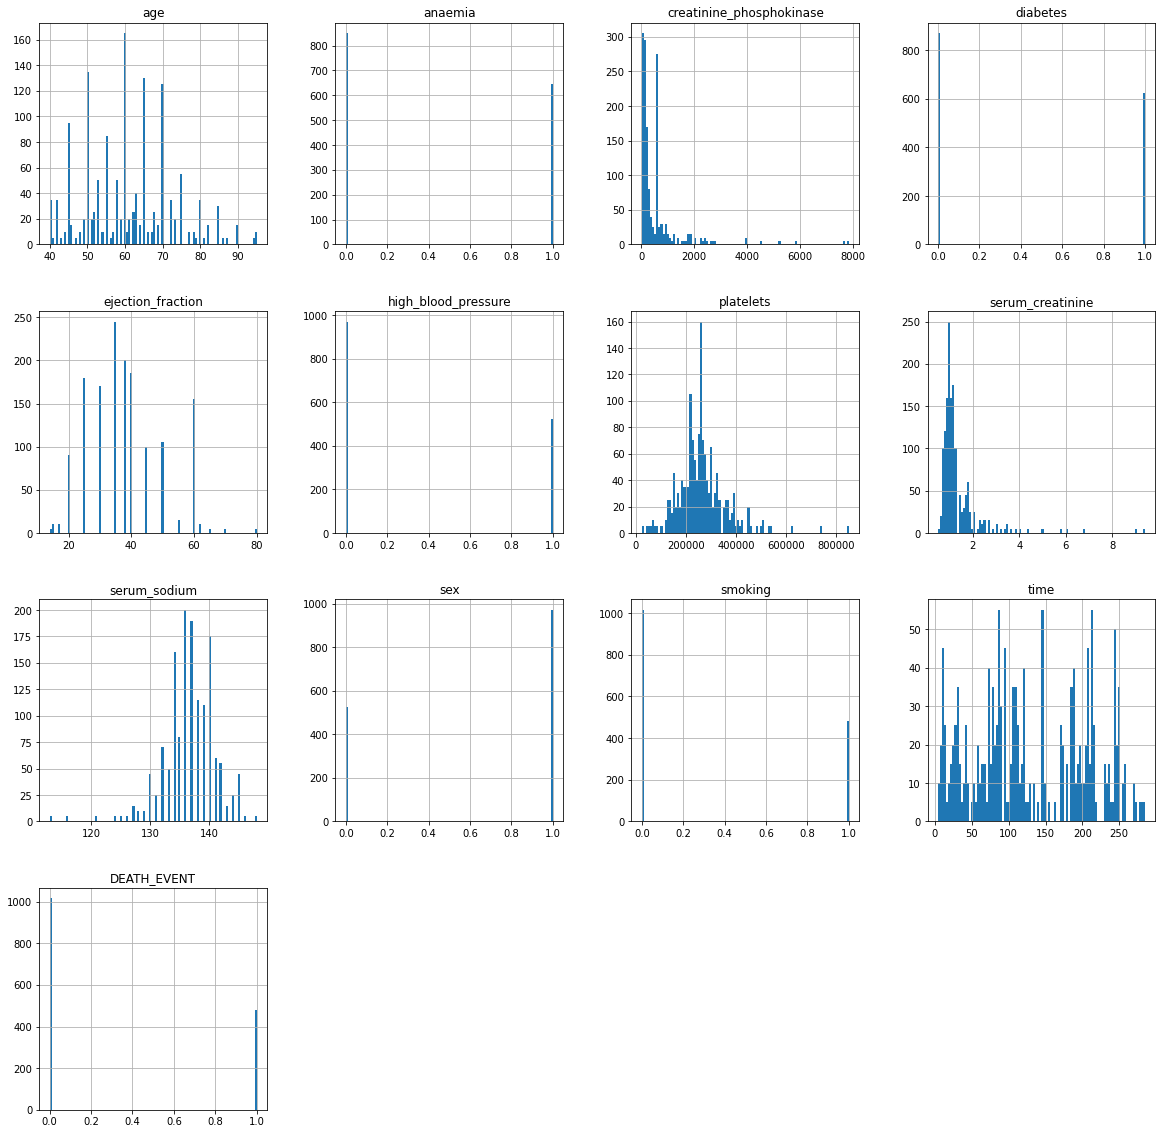

In [ ]:
df.hist(bins= 100, figsize = (20,20))

<Figure size 1080x1080 with 0 Axes>

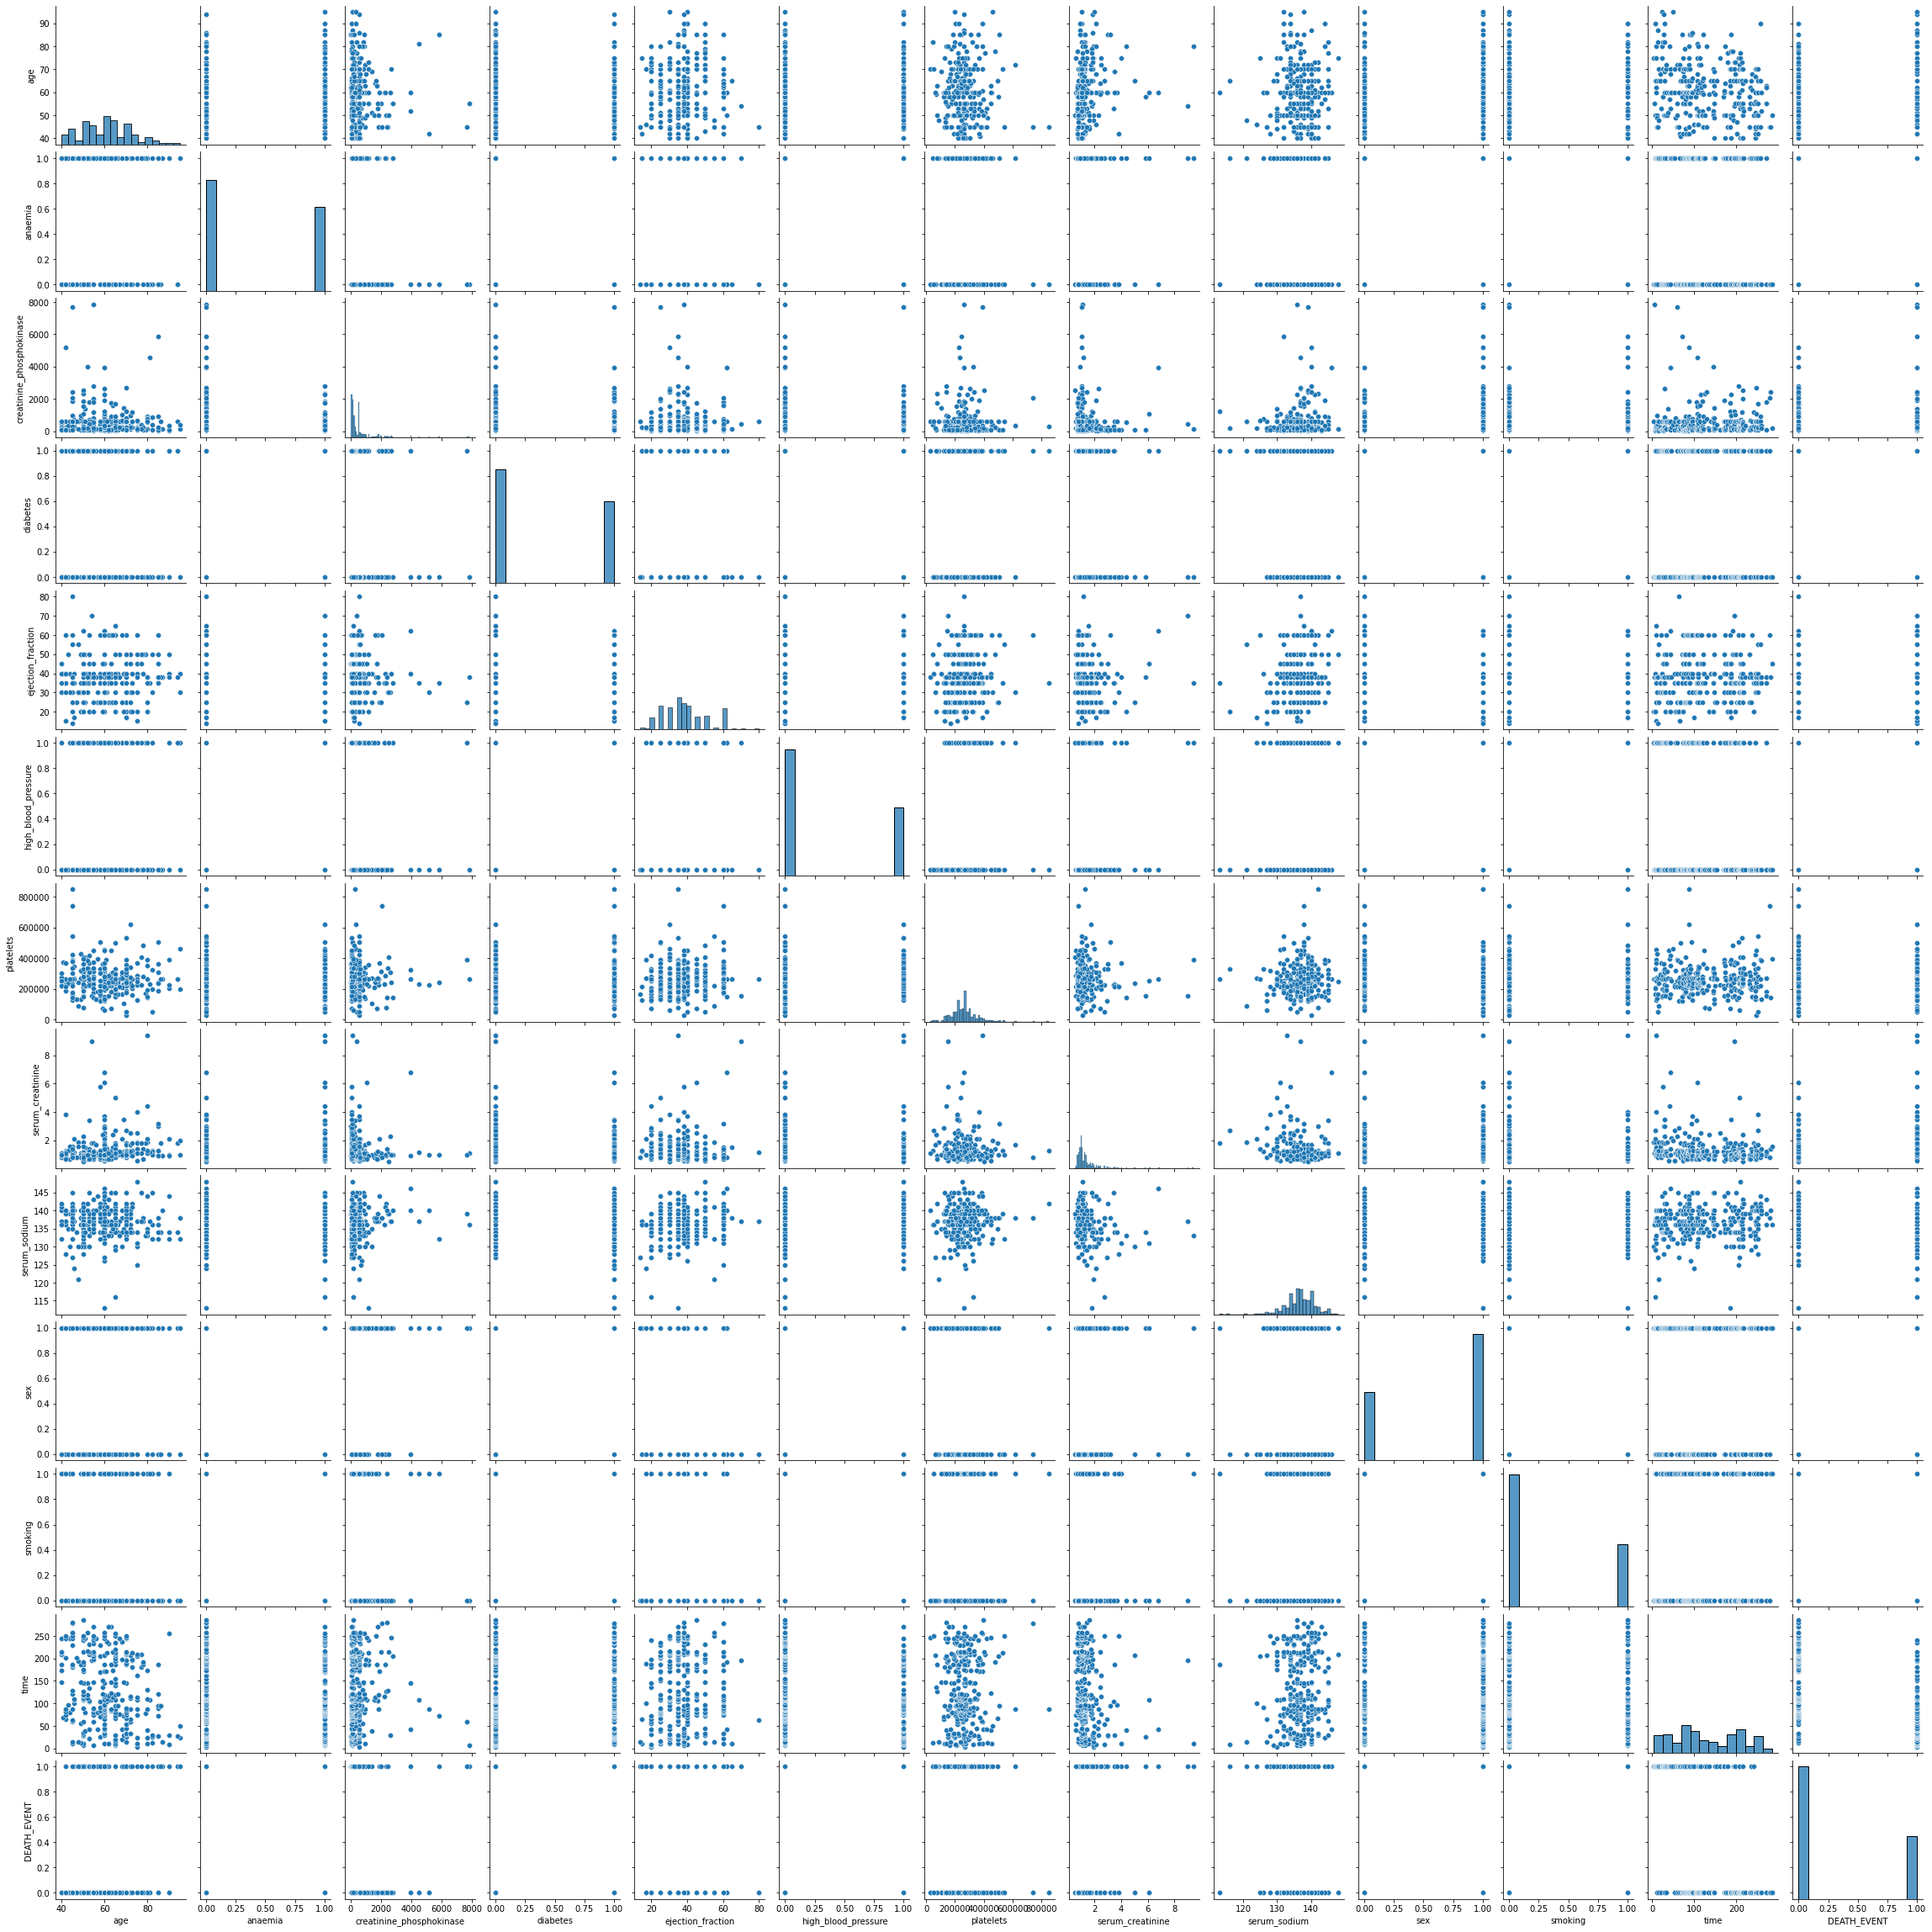

In [ ]:
plt.figure(figsize=(15,15))
sns.pairplot(df)

DataPrep Report
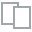
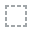
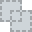
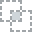
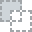
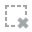
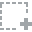
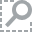
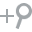
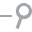
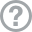
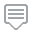
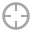
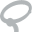
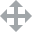
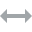
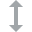
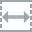
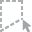
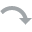
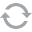
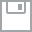
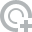
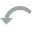
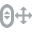
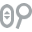
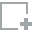
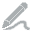
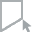
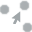
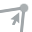
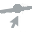

In [ ]:
create_report(df)

In [ ]:
X = df.drop('DEATH_EVENT',1)
y = df['DEATH_EVENT']
print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (1495, 12) (1495,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
# SPLIT data WRT test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
LR = model.score(X_train, y_train)
print('Training Score:', LR)
LR = model.score(X_test, y_test)
print('Testing Score:', LR)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease-Death yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
live_people = 0
if len(people) > 0 :
    live_people = len(people)/len(output)
print("% of people predicted will not be dead:", live_people)
score_LR = LR
out_LR = output
print(classification_report(y_test,Y_pred))

Training Score: 0.8369565217391305
Testing Score: 0.7993311036789298
   Predicted
0          0
1          0
2          0
3          1
4          0
% of people predicted will not be dead: 0.2809364548494983
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       189
           1       0.80      0.61      0.69       110

    accuracy                           0.80       299
   macro avg       0.80      0.76      0.77       299
weighted avg       0.80      0.80      0.79       299



In [ ]:
#DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5) 
decision_tree.fit(X_train, y_train)  
Y_pred = model.predict(X_test)
DTC= model.score(X_train, y_train)
print('Training Score:', DTC)
DTC = model.score(X_test, y_test)
print('Testing Score:', DTC)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease_death yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
live_people = 0
if len(people) > 0 :
    live_people = len(people)/len(output)
print("% of people predicted wiLL not be dead:", live_people)
score_DTC = DTC
out_DTC = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))
DecisionTreeClassifier

Training Score: 0.8369565217391305
Testing Score: 0.7993311036789298
   Predicted
0          0
1          0
2          0
3          1
4          0
% of people predicted wiLL not be dead: 0.2809364548494983
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       189
           1       0.80      0.61      0.69       110

    accuracy                           0.80       299
   macro avg       0.80      0.76      0.77       299
weighted avg       0.80      0.80      0.79       299



sklearn.tree._classes.DecisionTreeClassifier

In [ ]:
#Random Forest Classifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
RFC = model.score(X_train, y_train)
print('Training Score:', RFC)
RFC = model.score(X_test, y_test)
print('Testing Score:', RFC)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease-death yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
live_people = 0
if len(people) > 0 :
    live_people = len(people)/len(output)
print("% of people predicted will not be dead:", live_people)
score_RFC = RFC
out_RFC = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Training Score: 1.0
Testing Score: 1.0
   Predicted
0          0
1          0
2          0
3          1
4          1
% of people predicted will not be dead: 0.36789297658862874
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       110

    accuracy                           1.00       299
   macro avg       1.00      1.00      1.00       299
weighted avg       1.00      1.00      1.00       299



In [ ]:
#K-Neighbors Classifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
KNC = model.score(X_train, y_train)
print('Training Score:', score_logreg)
KNC = model.score(X_test, y_test)
print('Testing Score:', KNC)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
live_people = 0
if len(people) > 0 :
    live_people = len(people)/len(output)
print("% of people predicted will not be daed:", live_people)
score_KNC = KNC
out_KNC = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Training Score: 0.7993311036789298
Testing Score: 0.8695652173913043
   Predicted
0          0
1          0
2          0
3          1
4          1
% of people predicted will not be daed: 0.3377926421404682
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       189
           1       0.85      0.78      0.82       110

    accuracy                           0.87       299
   macro avg       0.87      0.85      0.86       299
weighted avg       0.87      0.87      0.87       299



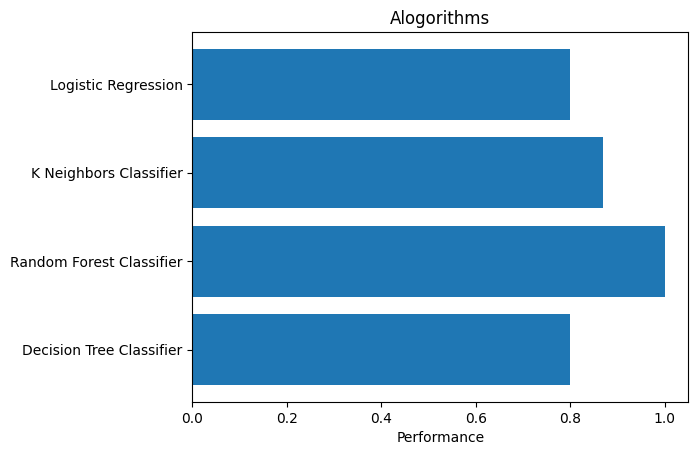

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier')
y_pos = np.arange(len(algorithms))
x = (score_LR, score_KNC, score_RFC, score_DTC)
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis()
ax.set_xlabel('Performance')
ax.set_title('Alogorithms')
plt.show()

In [ ]:
results=pd.DataFrame(columns=['score'])
results.loc['Logistic Regression']=[score_LR]
results.loc['Decision Tree Classifier']=[score_DTC]
results.loc['Random Forest Classifier']=[score_RFC]
results.loc['K-Neighbors Classifier']=[score_KNC]

In [ ]:
#CONCLUSIONS
results.sort_values('score',ascending=False).style.background_gradient(cmap='Greens',subset=['score'])

,score
Random Forest Classifier,1.000000
K-Neighbors Classifier,0.869565
Logistic Regression,0.799331
Decision Tree Classifier,0.799331
